<a href="https://colab.research.google.com/github/williamokomba/AICE-Artificial-Intelligence-Diploma/blob/main/Part1_Code_For_ASTIS_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **APPLE INC (AAPL) STOCK MARKET PREDICTION ANALYSIS**

## **1.0 Defining the Question**

A stock market, equity market, or share market is the aggregation of buyers and sellers of [stock](https://en.wikipedia.org/wiki/Stock) (also called shares), which represent [ownership](https://en.wikipedia.org/wiki/Ownership) claims on businesses; these may include securities listed on a public [stock exchange](https://en.wikipedia.org/wiki/Stock_exchange), as well as stock that is only traded privately, such as shares of private companies which are sold to [investors](https://en.wikipedia.org/wiki/Investor) through [equity crowdfunding](https://en.wikipedia.org/wiki/Equity_crowdfunding) platforms. Investment is usually made with an [investment strategy ](https://en.wikipedia.org/wiki/Investment_strategy) in mind.

Stocks can be categorized by the country where the company is domiciled. For example, Nestlé and Novartis are domiciled in Switzerland and traded on the SIX Swiss Exchange, so they may be considered as part of the Swiss stock market, although the stocks may also be traded on exchanges in other countries, for example, as [Apple inc](https://finance.yahoo.com/quote/AAPL/) (AAPL) on U.S. stock markets.


Dataset: 
Apple stock prices dataset: [link](https://finance.yahoo.com/quote/AAPL/)


**Dataset Columns:**

1. symbol: company name
2. date: trading date
3. close: stock price at day closing time
4. high: highest day stock price
5. low: lowest day stock  price
6. open: stock price at day opening time
7. volume: total stock
8. adjClose: adjusted closing price
9. adjHigh: adjusted high price
10. adjLow: adjusted low price
11. adjOpen: adjusted open price
12. adjVolume: adjusted stock volume
13. divCash: A cash dividend is a payment doled out by a company to its stockholders in the form of periodic distributions of cash (as opposed to stock or any other form)
14. splitFactor: a number resulting from dividing (i) the Equity Value by (ii) the product of (x) the Aggregate Fully Diluted Company Shares, and (y) 10.


## **1.1 Specifying the data analytic question (Objective)**

To figure out how to predict stock market prices give a one variable (univariate LSTM)

## **1.2 Defining the Metric for Success**
Since the problem we are tackling is a regression problem, we will use RMSE and accuracy to measure the success of the models used. 

Our successful model should have an MSE of < 0.1 and an accuracy of above 85%

###**1.3 Understanding the Context**

Stock exchange is where there is selling and buying of stocks. the target population are the investors and speculators.

## 1.4 Recording the Experimental Design
- load libraries and dataset
- clean dataset:
    - deal with duplicate and/or missing values
    - deal with other anomalies in the data, where necessary
- carry out exploratory data analysis
- carry out feature engineering
- carry out modeling
- summarize and provide recommendations
- challenge the solution

###**1.5 Assessing the Relevance of the Data**

This dataset is sourced from yahoo through pandas reader and it represent update date records.

## **2.Loading and reading Our Datasets**

In [ ]:
#installing the required packages

#Upgrade pandas
!pip3 install --upgrade pandas

#Install pandas datareader
!pip install pandas-datareader

In [ ]:
# Loading the basic libraries
#load pandas
import pandas as pd               # library for data manipulation and analysis
# load numpy
import numpy as np                # library for performin scientific computations
# load matplotlib.pyplot
import matplotlib.pyplot as plt   # library for creating basic visualisations
# load Seaborn
import seaborn as sns             # library for creating rich data visualisation
#Data collection
#
%matplotlib inline


### **1. Collecting the stock data (AAPL)**

In [ ]:
#Data collection
import pandas_datareader as pdr
#Assigning the dataset key to a variable key
key= "2bc19e895a60ab8aecc6d8d450d5090e5f8dad79"

In [ ]:
#Data collection
data = pdr.get_data_tiingo("AAPL", api_key=key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
#saving data to csv
data.to_csv("AAPL.csv")

In [ ]:
#lading and reading the dataset
data=pd.read_csv("/content/AAPL.csv")

## **3. Checking the Data**

In [ ]:
#checking first 5 rows
data.head(3)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-03-27 00:00:00+00:00,140.88,141.22,138.62,139.39,23575094,33.248219,33.328460,32.714850,32.896573,94300376,0.0,1.0
1,AAPL,2017-03-28 00:00:00+00:00,143.80,144.04,140.62,140.91,33374805,33.937350,33.993991,33.186858,33.255299,133499220,0.0,1.0
2,AAPL,2017-03-29 00:00:00+00:00,144.12,144.49,143.19,143.68,29189955,34.012871,34.100193,33.793388,33.909030,116759820,0.0,1.0


In [ ]:
#checking the tail
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-03-17 00:00:00+00:00,160.62,161.00,157.630,158.61,75615376,160.62,161.00,157.630,158.61,75615376,0.0,1.0
1254,AAPL,2022-03-18 00:00:00+00:00,163.98,164.48,159.760,160.51,122055535,163.98,164.48,159.760,160.51,122055535,0.0,1.0
1255,AAPL,2022-03-21 00:00:00+00:00,165.38,166.35,163.015,163.51,89029269,165.38,166.35,163.015,163.51,89029269,0.0,1.0
1256,AAPL,2022-03-22 00:00:00+00:00,168.82,169.42,164.910,165.51,80979755,168.82,169.42,164.910,165.51,80979755,0.0,1.0
1257,AAPL,2022-03-23 00:00:00+00:00,170.21,172.64,167.650,167.99,98062674,170.21,172.64,167.650,167.99,98062674,0.0,1.0


**Onservation:** the dataset is uniform from top to the bottom.

In [ ]:
#cheking the shape
print("The dataset has {} records and  {} variables".format(data.shape[0], data.shape[1]))

The dataset has 1258 records and  14 variables


In [ ]:
#checking the datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


**Observation:** the datset has 10 float, 2 integer, and 2 object datatypes.

The entries are the same, this is a hind that there is no missing values.

In [ ]:
#creating a copy
data1=data.copy(deep=True)

In [ ]:
#checking the columns
data1.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

**Observation:** columns has no spelling issues.

In [ ]:
#consice summary statistics of the datset
data1.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000
mean,191.516995,193.413503,189.373989,191.304114,5.355189e+07,79.560185,80.395476,78.641697,79.498724,1.197809e+08,0.009102,1.002385
std,68.591749,69.308642,67.523750,68.294327,4.043383e+07,44.327596,44.855460,43.749403,44.301911,5.519354e+07,0.077803,0.084583
min,106.840000,110.190000,103.100000,104.540000,1.136204e+07,33.201018,33.328460,32.714850,32.896573,4.099995e+07,0.000000,1.000000
25%,147.922500,148.997500,146.380700,147.655000,2.488730e+07,42.268034,42.553759,41.848798,42.243065,8.325148e+07,0.000000,1.000000
50%,172.410000,174.050000,170.915000,172.362500,3.632856e+07,54.914008,55.381777,54.476057,55.056925,1.049551e+08,0.000000,1.000000
75%,209.557500,211.997500,207.605000,209.870000,7.504217e+07,122.135526,123.710822,120.472070,122.490086,1.399190e+08,0.000000,1.000000
max,506.090000,515.140000,500.330000,514.790000,3.326072e+08,181.778019,182.706834,178.891703,182.397229,4.268849e+08,0.820000,4.000000


Observation: the mean price of the closing variable is 191.45, the minimum price is 106.84, median closing price is 172.39 and maimum closing price is 506.09 us dollars for the period under analysis.

## **4. External Data Source Validation**

### **a. Validation**

In [ ]:
data1.date

0       2017-03-27 00:00:00+00:00
1       2017-03-28 00:00:00+00:00
2       2017-03-29 00:00:00+00:00
3       2017-03-30 00:00:00+00:00
4       2017-03-31 00:00:00+00:00
                  ...            
1253    2022-03-17 00:00:00+00:00
1254    2022-03-18 00:00:00+00:00
1255    2022-03-21 00:00:00+00:00
1256    2022-03-22 00:00:00+00:00
1257    2022-03-23 00:00:00+00:00
Name: date, Length: 1258, dtype: object

**Observation:** this is the standard Gregorian date, thus the data is valid.

## **5. Tidying the Dataset**

In [ ]:
#creating a copy for data cleaning
data_df= data1.copy(deep=True)

In [ ]:
#checking for null values
print("There is {} null values and {} duplicates". format(data_df.isnull().sum().sum(),data_df.duplicated().sum().sum()))

There is 0 null values and 0 duplicates


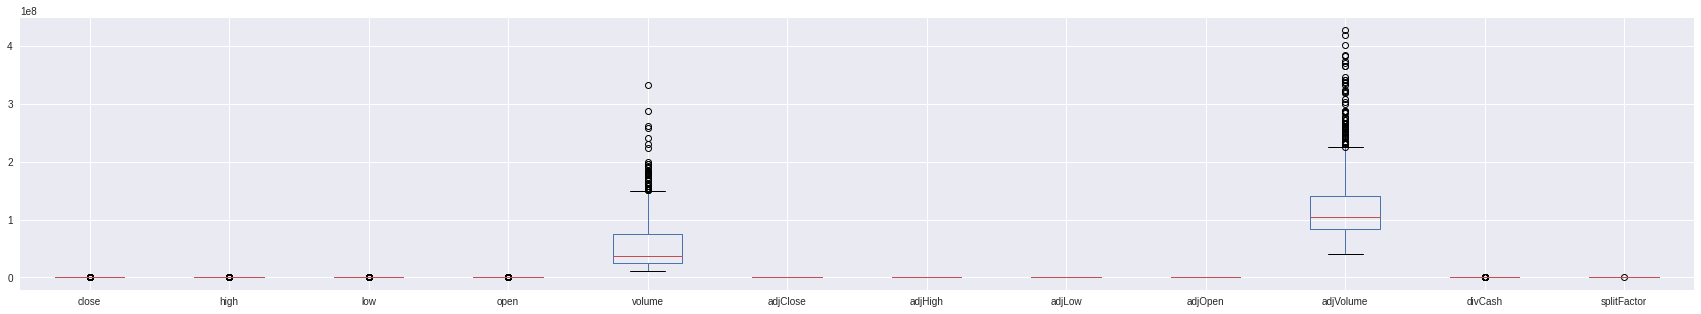

In [ ]:
#Checking for outliers
plt.figure(figsize = (30, 5))
data_df.boxplot()
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



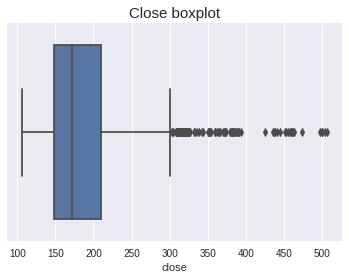

In [ ]:
#checking the close variable outlier
sns.boxplot(data_df['close'])
plt.title("Close boxplot", fontsize=15);

Observations: there are alot of outliers, however, we will not remove them since they present the true values of the stock exchange records.

In [ ]:
#dropping unnessary columns "symbol"
data_df.drop(columns='symbol', inplace=True)
#checking
data_df.head(2)

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2017-03-27 00:00:00+00:00,140.88,141.22,138.62,139.39,23575094,33.248219,33.328460,32.714850,32.896573,94300376,0.0,1.0
1,2017-03-28 00:00:00+00:00,143.80,144.04,140.62,140.91,33374805,33.937350,33.993991,33.186858,33.255299,133499220,0.0,1.0


## **6. Exploratory Data Analysis**

### **6.1. Univariate analysis**

We will now perform univariate analysis. This is a type of analysis done only one variable. This type of analysis will be helpful in understanding the characteristics of each variables

In [ ]:
#Checking the central tedency of the numerical variables
#
#creating a copy to be used in EDA
data_df1= data_df.copy(deep=True)

numCol= ['close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor']

for column in numCol:
  print("\n")
  print(column + " variable standard deviation is : " + str(data_df1[column].std()))
  print(column + " variable variance is : " + str(data_df1[column].var()))
  print(column + " variable kurtosis is : " + str(data_df1[column].kurt()))
  print(column + " variable mean is : " + str(data_df1[column].mean()))
  print(column + " variable skewness is : " + str(data_df1[column].skew()))



close variable standard deviation is : 68.59174875729998
close variable variance is : 4704.827997584564
close variable kurtosis is : 3.6963537824485533
close variable mean is : 191.51699522893472
close variable skewness is : 1.802026687688597


high variable standard deviation is : 69.30864228824294
high variable variance is : 4803.687895839616
high variable kurtosis is : 3.7010202523092133
high variable mean is : 193.4135027821941
high variable skewness is : 1.8063140672548645


low variable standard deviation is : 67.52375014276832
low variable variance is : 4559.456833343004
low variable kurtosis is : 3.6670793593863955
low variable mean is : 189.37398863275033
low variable skewness is : 1.7910441768787038


open variable standard deviation is : 68.29432725182338
open variable variance is : 4664.115134779146
open variable kurtosis is : 3.745806888696757
open variable mean is : 191.30411406995216
open variable skewness is : 1.8076165858135544


volume variable standard deviation is

**Observation,** most of the variables are positively skewed

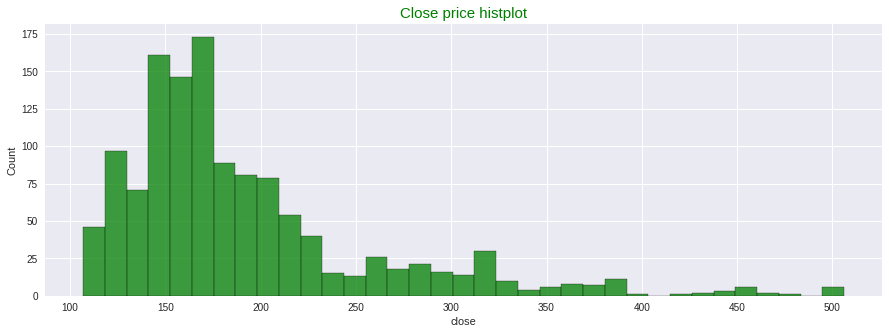

In [ ]:
# Univariate analysis: close variable histogram
plt.figure(figsize=(15,5))
sns.histplot(data_df1["close"], color= "g")
plt.title("Close price histplot", fontsize=15, color="g");

**Observation**: moset of the closing  prices lies between 130-170 Us dollars, and is positively skewded. this is because the mean is greater than the mode.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



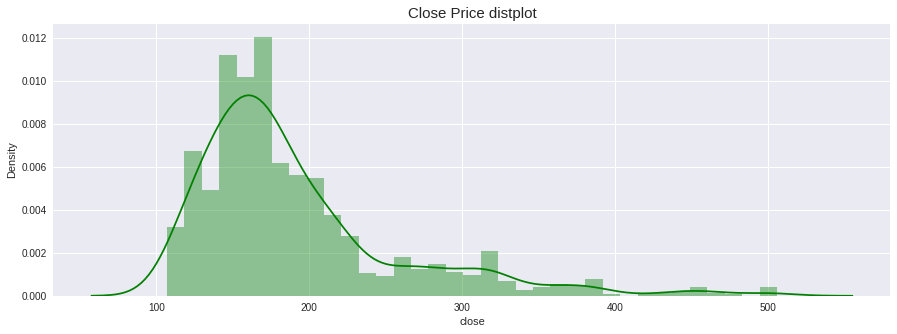

In [ ]:
#univariate analysis- close variable
plt.figure(figsize = (15, 5))
sns.distplot(data_df1.close, color= "g")
plt.title("Close Price distplot", fontsize=15)
plt.show()

Observation: The variable is not normally distributed.

### **We can do more visualization using pywedge Dashboard**

In [ ]:
#Installing the package
#!pip install pywedge # installing pywedge package

#importing module
import pywedge as pw # installing pywedge
import pandas as pd

In [ ]:
#creating the dashboard
mc= pw.Pywedge_Charts(data, c="symbol", y= "close")

charts= mc.make_charts()

/usr/local/lib/python3.7/dist-packages/pywedge/pywedge.py:27: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



HTML(value='<h2>Pywedge Make_Charts </h2>')

/usr/local/lib/python3.7/dist-packages/pywedge/pywedge.py:49: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



### **6b. Bivariate analysis**

We now perform bivariate analysis, which is a type of analysis that involves two variables. The main objective is to understand the relationships between these two types of variables

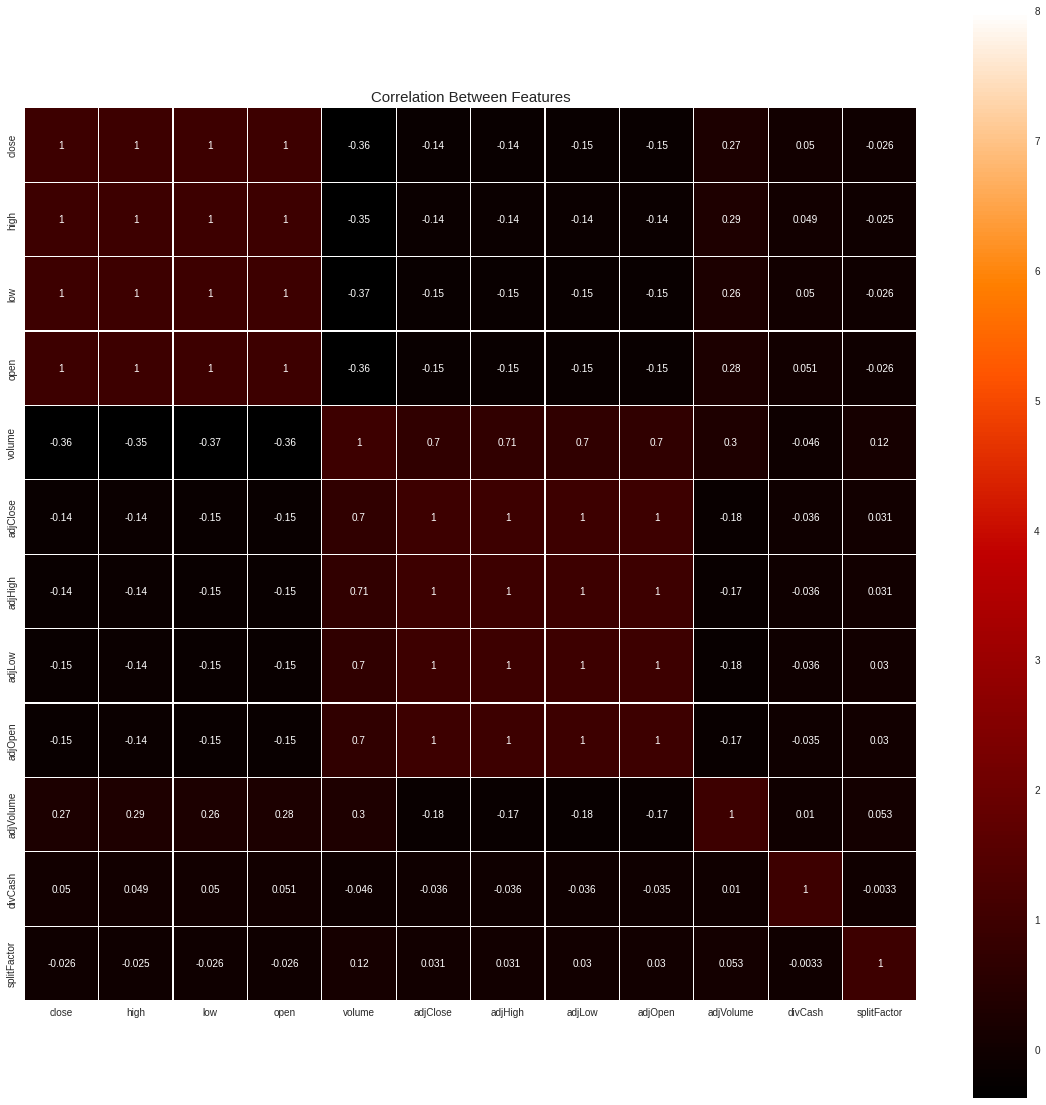

In [ ]:
#checking relationship between variable
#checking correlation coefficeints
corr =data_df1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax = 8, linewidth=0.01, square = True,  annot=True, cmap= "gist_heat", linecolor="white")
plt.title("Correlation Between Features", size=15)
plt.show()

**Observation:** There is no cours of alam since since there is no strong +ve correlation between varaible. also based on the nature of the data(time series) it is good to ignore this part.

In [ ]:
#converting date to dateime
import datetime
data_df1['date'] = pd.to_datetime(data_df1['date'], utc=None)
data_df1['dates'] = pd.to_datetime(data_df1['date']).dt.date
#
#dropping the date column"
data_df1.drop(columns='date', inplace=True)
#
#make dates to datetime
data_df1['dates'] = pd.to_datetime(data_df1['dates'], utc=None)
data_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   close        1258 non-null   float64       
 1   high         1258 non-null   float64       
 2   low          1258 non-null   float64       
 3   open         1258 non-null   float64       
 4   volume       1258 non-null   int64         
 5   adjClose     1258 non-null   float64       
 6   adjHigh      1258 non-null   float64       
 7   adjLow       1258 non-null   float64       
 8   adjOpen      1258 non-null   float64       
 9   adjVolume    1258 non-null   int64         
 10  divCash      1258 non-null   float64       
 11  splitFactor  1258 non-null   float64       
 12  dates        1258 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 127.9 KB


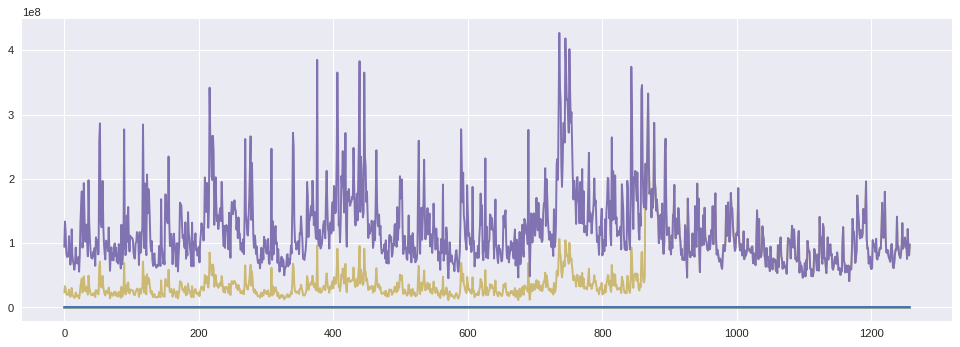

In [ ]:
#checking the c=visualization of all the variable
from matplotlib.pyplot import figure
figure(figsize=(15, 5), dpi=80)
plt.plot(data_df1);

Observation: this is an overview of variable occurance over time

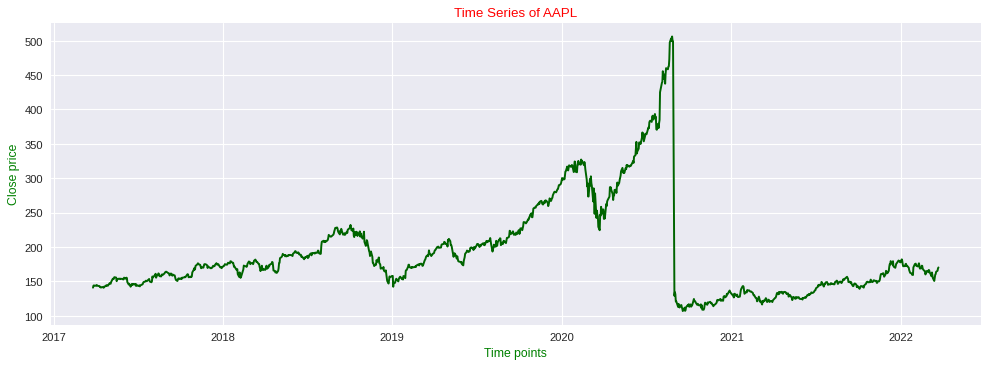

In [ ]:
#Bivariate analysis: date vs close price
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 5), dpi=80)
plt.plot(data_df1["dates"],data_df1["close"], color="darkgreen")
plt.xlabel("Time points", color="g")
plt.ylabel("Close price", color="g")
plt.title("Time Series of AAPL", color="r");


**Observation:** there was a staedy increase frm 2017 to early 2019. however there was a sudden decline in 2020. this can be attributed to Covid 19. there is again decline in 2022 due to Russia-Ukrain conflict.

In [ ]:
data1.set_index("date")

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2017-03-27 00:00:00+00:00,AAPL,140.88,141.22,138.620,139.39,23575094,33.248219,33.328460,32.714850,32.896573,94300376,0.0,1.0
2017-03-28 00:00:00+00:00,AAPL,143.80,144.04,140.620,140.91,33374805,33.937350,33.993991,33.186858,33.255299,133499220,0.0,1.0
2017-03-29 00:00:00+00:00,AAPL,144.12,144.49,143.190,143.68,29189955,34.012871,34.100193,33.793388,33.909030,116759820,0.0,1.0
2017-03-30 00:00:00+00:00,AAPL,143.93,144.50,143.500,144.19,21207252,33.968031,34.102553,33.866549,34.029392,84829008,0.0,1.0
2017-03-31 00:00:00+00:00,AAPL,143.66,144.27,143.010,143.72,19661651,33.904310,34.048272,33.750907,33.918470,78646604,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-17 00:00:00+00:00,AAPL,160.62,161.00,157.630,158.61,75615376,160.620000,161.000000,157.630000,158.610000,75615376,0.0,1.0
2022-03-18 00:00:00+00:00,AAPL,163.98,164.48,159.760,160.51,122055535,163.980000,164.480000,159.760000,160.510000,122055535,0.0,1.0
2022-03-21 00:00:00+00:00,AAPL,165.38,166.35,163.015,163.51,89029269,165.380000,166.350000,163.015000,163.510000,89029269,0.0,1.0


## **7.0 Implementing the Solution**

###**7.1. Data Preprocessing for  LSTM modeling.**

I will select the variable to be used in the modeling part.

In [ ]:
#stock prediction using closing price
data2=data_df1.reset_index()["close"]
print("Dataset shape","\n", data2.shape)
print("***"*10)
print("Dataset review","\n",data2.head())

Dataset shape 
 (1258,)
******************************
Dataset review 
 0    140.88
1    143.80
2    144.12
3    143.93
4    143.66
Name: close, dtype: float64


### **7.2. Normalizing the dataset**

LSTM are sensitive to the scale of the date. so we apply MinMax scaler


In [ ]:
#imprting MinMax scaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
#scaling the data/normalizing the dataset
scaler=MinMaxScaler(feature_range=(0,1))
data2=scaler.fit_transform(np.array(data2).reshape(-1,1))
#
#checking shape
data2.shape

(1258, 1)

### **7.3 Dividing the data Into train and test set**

In regression/classification we devide data into train and test data using random seed or cross validation.

However, in time series the current value depend on previous values(sequence data). In this case we can split based on dates

In [ ]:
#splitting dataset into train and test split

training_size= int(len(data2)*0.65)
test_size = len(data)- training_size
train_data, test_data= data2[0:training_size, :], data2[training_size:len(data2),:1]

##checking the size
training_size, test_size

(817, 441)

After splitting data into 65% training and 35% testing, we get 817 records for train and 441 records for test data.

### **7.4 Introducing Time Step**

In [ ]:
#Data preprocessing
import numpy
# inroducing the time stamp
#convert an array of values into  a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset [i:(i+time_step), 0] ## i =0,1,2,3----99    
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)


This is a function which help us split data into train and test data based on time step.

In [ ]:
# using 100 days as out time step.
#Reshape into X=t, t+1, t+3, and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
#
#priew of X_train dataset
print(X_train)

[[0.08525986 0.09257358 0.09337508 ... 0.13277395 0.13715717 0.13552912]
 [0.09257358 0.09337508 0.09289919 ... 0.13715717 0.13552912 0.12778961]
 [0.09337508 0.09289919 0.09222292 ... 0.13552912 0.12778961 0.12688791]
 ...
 [0.50622417 0.52811522 0.54477145 ... 0.59148403 0.61425172 0.61302442]
 [0.52811522 0.54477145 0.54359424 ... 0.61425172 0.61302442 0.61337508]
 [0.54477145 0.54359424 0.5076268  ... 0.61302442 0.61337508 0.60834064]]


I used 100 days as our time step to assign records to train and test sets.

**Observation:** the normalized dvalues ranges between 0 to 1. meaning all the data points are on the same scale.

In [ ]:
#checking train data
print("Train Dataset","\n",X_train.shape), print(y_train.shape)
print("***"*10)
#checking test data
print("Test Dataset","\n", X_test.shape), print(y_test.shape)

Train Dataset 
 (716, 100)
(716,)
******************************
Test Dataset 
 (340, 100)
(340,)


(None, None)

### **7.5 Reshaping the Input**

LSTM works with 3D array.

In [ ]:
#reshape input to be [sample, time_step, features] which is required by LSTM (3D array....use of 1)

X_train= X_train.reshape(X_train.shape[0], X_train.shape[1], 1) 
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

## **8.0 Creating Univariate LSTM Model**

In [ ]:
#installing tensorflow
#!pip install tensorflow
#
#importing the keras library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import SGD

#checking tensorflow version
tf.__version__

'2.8.0'

In [ ]:
#create stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1), activation="linear"))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
#
#compling the model
model.compile(loss="mean_squared_error", optimizer="adam")


In [ ]:
#checking the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#computing the model history
history= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 13s 508ms/step - loss: 0.0229 - val_loss: 0.0021
Epoch 2/100
12/12 [==============================] - 4s 381ms/step - loss: 0.0045 - val_loss: 0.0050
Epoch 3/100
12/12 [==============================] - 4s 376ms/step - loss: 0.0020 - val_loss: 7.9889e-04
Epoch 4/100
12/12 [==============================] - 4s 345ms/step - loss: 0.0012 - val_loss: 2.8024e-04
Epoch 5/100
12/12 [==============================] - 4s 328ms/step - loss: 0.0011 - val_loss: 2.8333e-04
Epoch 6/100
12/12 [==============================] - 4s 295ms/step - loss: 0.0010 - val_loss: 3.1466e-04
Epoch 7/100
12/12 [==============================] - 2s 175ms/step - loss: 9.3691e-04 - val_loss: 3.2929e-04
Epoch 8/100
12/12 [==============================] - 2s 174ms/step - loss: 8.9428e-04 - val_loss: 2.6899e-04
Epoch 9/100
12/12 [==============================] - 2s 176ms/step - loss: 8.5895e-04 - val_loss: 3.5722e-04
Epoch 10/100
12/12 [==============================

In [ ]:
# Getting the validation  loss
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 29ms/step - loss: 1.1869e-04


0.00011868840374518186

**Observation:** the model perfomed super great!, the validation loss is close to zero.

### **8.1. Predict the test data and plot the output**

In [ ]:
#predicting and checking the performance metrics

train_predict= model.predict(X_train)
test_predict= model.predict(X_test)

After prediction, we can now check the model performance.

In [ ]:
## Calculating the RMSE performance metrics

import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train, train_predict))

0.016717715423852753

In [ ]:
#checking data mSE

math.sqrt(mean_squared_error(y_test, test_predict))

0.010894421474217144

**Observation**: the model gave a MSE of 0.016 for train, and 0.010 for test data, this is greate since it is <.1

In [ ]:
#checking the model accuracy
from sklearn.metrics import r2_score
r2_score(y_test,test_predict)

0.9374373778191017

Observation: The Model accuracy is 93%. 

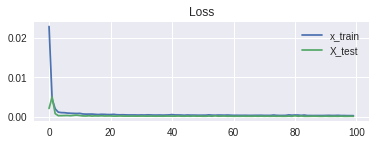

In [ ]:
#plotting loss during training
from matplotlib import pyplot
plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], label="x_train")
plt.plot(history.history["val_loss"], label="X_test")
plt.legend();

In [ ]:
#checking for overfitting
residuals = np.subtract(test_predict, y_test)
# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.006307793093091489

**Observation:** the residual is close to 0. this means the model is not overfitting. 

In [ ]:
#transform to the original form
test_predict= scaler.inverse_transform(test_predict)
test_predict= model.predict(test_predict)

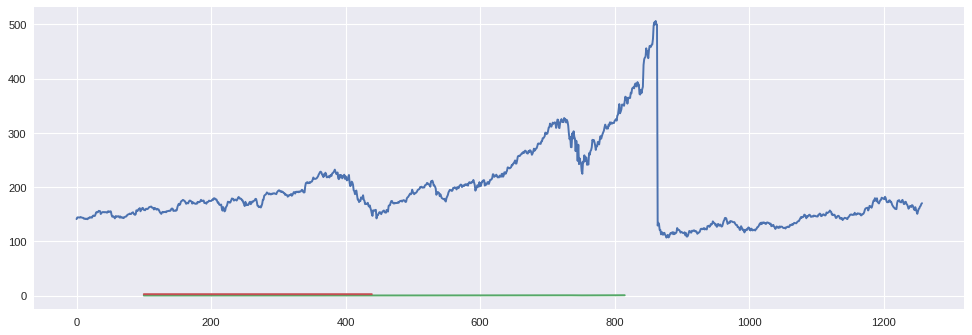

In [ ]:
# plotting
#shift train prediction for plotting
look_back =100
trainpredictplot = numpy.empty_like(data2)
trainpredictplot[:, :] = np.nan
trainpredictplot[look_back:len(train_predict) + look_back, :] = train_predict
#shift test predict for plotting
testpredictplot = numpy.empty_like(data2)
testpredictplot[:, :] = np.nan
testpredictplot[look_back:len(test_predict) + look_back, :] = test_predict

#plot baseline and prediction
figure(figsize=(15, 5), dpi=80)
plt.plot(scaler.inverse_transform(data2))
plt.plot(trainpredictplot)
plt.plot(testpredictplot);


Observation: blue is the all the dataset
green is the training dataset

yellow is the test dataset


### **8.2. Predicting the future 10 days and plotting the output**

In [ ]:
#checking the shape of the test data# we take the 100 previous days to predict the future values
print(len(test_data))
print(len(test_data)-100)

441
341


To predict 10 days, we will take 100 data from the previus test_data. therefore the test data will remain with 341 data(441-100)

In [ ]:
#reshaping the previous dataset to be used for prediction
x_input= test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
#converting the above into a list
temp_input= list(x_input)
temp_input=temp_input[0].tolist()
#checking the 100 value
temp_input

[0.10760175328741389,
 0.10549780839073258,
 0.10815278647463994,
 0.11183469004383217,
 0.1105072010018785,
 0.11130870381966185,
 0.10920475892298054,
 0.11013149655604254,
 0.10289292423293667,
 0.10276768941765807,
 0.10807764558547273,
 0.10810269254852845,
 0.11060738885410137,
 0.11684408265497809,
 0.12781465247338758,
 0.13452723857232307,
 0.13570444583594238,
 0.13668127739511576,
 0.13800876643706944,
 0.12515967438948022,
 0.1337507827175955,
 0.14642454602379462,
 0.14509705698184094,
 0.14256731371321218,
 0.1377582968065122,
 0.146474639949906,
 0.1611521603005635,
 0.17092047589229803,
 0.16961803381340007,
 0.18186599874765175,
 0.17257357545397617,
 0.16904195366311836,
 0.1814902943018159,
 0.1638572323105823,
 0.16105197244834057,
 0.1575704445835942,
 0.1656856606136506,
 0.1723231058234188,
 0.17392611145898557,
 0.18407013149655604,
 0.18146524733876013,
 0.1816906700062617,
 0.1787351283656856,
 0.17715716969317463,
 0.18827802128991855,
 0.182492172824045,
 0.

### logic to return next 30 days predictions.

In [ ]:
#creating an argument with conditions

#predicting next 10 days
from numpy import array

lst_output =[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_i)
        x_input= np.array(temp_input[1:])
        print("{} day output {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps, 1))
        #print(X_input)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[i:]
        #print (temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)




[0.14740069]
100
[0.14740069]
101
2 day output [0.18149029 0.16385723 0.16105197 0.15757044 0.16568566 0.17232311
 0.17392611 0.18407013 0.18146525 0.18169067 0.17873513 0.17715717
 0.18827802 0.18249217 0.17051972 0.16320601 0.16363181 0.1636819
 0.17092048 0.17204759 0.1636819  0.16588604 0.15769568 0.14875391
 0.14444584 0.13918597 0.13720726 0.13259862 0.1323732  0.13119599
 0.15902317 0.17016907 0.16974327 0.17282405 0.16546024 0.16418284
 0.16235441 0.1702943  0.17392611 0.16350657 0.15479023 0.15539136
 0.16518472 0.16458359 0.15539136 0.15143394 0.14396994 0.13332498
 0.14001252 0.14529743 0.1459737  0.14116468 0.14958046 0.14875391
 0.14108954 0.13139637 0.12673763 0.14053851 0.12944271 0.11994991
 0.1096556  0.1208516  0.13212273 0.13470257 0.14311835 0.14662492
 0.15524108 0.1587226  0.13747141 0.14116512 0.14363487 0.14363487
 0.1457911  0.1457911  0.1457911  0.1457911  0.14591065 0.14591065
 0.14591065 0.14591065 0.14591065 0.14591065 0.14591065 0.14591065
 0.14511313 0.14

In [ ]:
#ploting the above
day_new=np.arange(1,101)## the data we took from the previous dates
day_pred=np.arange(101,131)# future 30 days to be predicted

In [ ]:
#checking the prvious data
len(data2)

1258

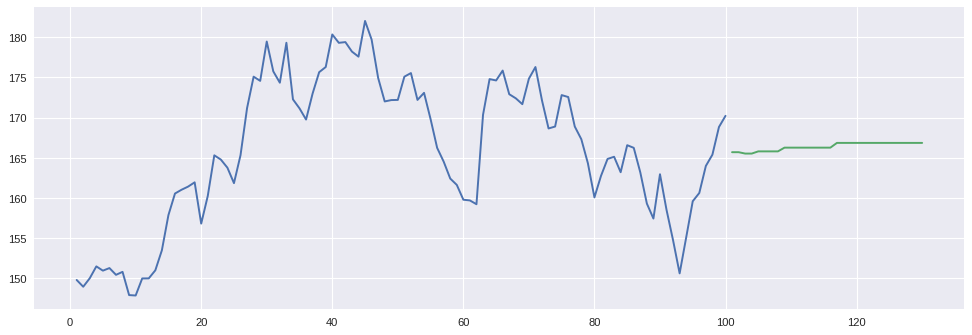

In [ ]:
#checking the 30 future prediction
import matplotlib.pyplot as plt

figure(figsize=(15, 5), dpi=80)
plt.plot(day_new, scaler.inverse_transform(data2[1158:]))# this is the value of data2-100(1268-100)
plt.plot(day_pred, scaler.inverse_transform(lst_output));

# **9.0 Challenging the solution**

I will try using xgboos ML model to check how it performs

## 9.1 Time Series Using Using Xgboost

In [ ]:
#installing scikit learn and xgboost
#!pip install -U scikit-learn
#!pip install xgboost
#!pip3 install Ipython
#!pip install nb_black

In [ ]:
import matplotlib
#loading libraries and debuggers
from IPython.core.debugger import set_trace
#%load_ext nb_black

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import time


plt.style.use(style="seaborn")
%matplotlib inline

In [ ]:
#Data collection
import pandas_datareader as pdr

#Assigning the dataset key to a variable key
key= "2bc19e895a60ab8aecc6d8d450d5090e5f8dad79"

#Data collection
data = pdr.get_data_tiingo("AAPL", api_key=key)

#saving data to csv
data.to_csv("AAPL.csv")

#loading and reading the dataset
data_df=pd.read_csv("/content/AAPL.csv")


/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
#previewing the 1st 5 rows of the dataset
data_df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-03-27 00:00:00+00:00,140.88,141.22,138.62,139.39,23575094,33.248219,33.328460,32.714850,32.896573,94300376,0.0,1.0
1,AAPL,2017-03-28 00:00:00+00:00,143.80,144.04,140.62,140.91,33374805,33.937350,33.993991,33.186858,33.255299,133499220,0.0,1.0
2,AAPL,2017-03-29 00:00:00+00:00,144.12,144.49,143.19,143.68,29189955,34.012871,34.100193,33.793388,33.909030,116759820,0.0,1.0
3,AAPL,2017-03-30 00:00:00+00:00,143.93,144.50,143.50,144.19,21207252,33.968031,34.102553,33.866549,34.029392,84829008,0.0,1.0
4,AAPL,2017-03-31 00:00:00+00:00,143.66,144.27,143.01,143.72,19661651,33.904310,34.048272,33.750907,33.918470,78646604,0.0,1.0


In [ ]:
#selecting closing varaibel to be used

data_df1= data_df[["close"]].copy(deep=True)
#
#checking the preview
data_df1.head()

,close
0,140.88
1,143.80
2,144.12
3,143.93
4,143.66


### Transforming the above into supervised learning problem

In [ ]:
#we will get the next day value as our target.
data_df1["target"] = data_df1.close.shift(-1)

In [ ]:
#dropping any null values that might have arised
data_df1.dropna(inplace=True)
#
#previewing the new dataframe
data_df1.head()

,close,target
0,140.88,143.80
1,143.80,144.12
2,144.12,143.93
3,143.93,143.66
4,143.66,143.70


In [ ]:
#splitting the data

#creating a function to do the splitting

def train_test_split(data,perc):
    data=data.values
    n=int(len(data)* (1-perc))
    return data[:n], data[n:]

In [ ]:
#Getting train and test dataset

train, test= train_test_split(data_df1,0.2) # splitting 80:20

#confirming the split

print(len(data_df1))
print(len(train))
print(len(test))

1257
1005
252


In [ ]:
#creating x and y
X=train[:, :-1]
y=train[:,-1]

#checking x 

X

array([[140.88],
       [143.8 ],
       [144.12],
       ...,
       [119.99],
       [123.39],
       [122.54]])

In [ ]:
#checking y
y

array([143.8 , 144.12, 143.93, ..., 123.39, 122.54, 120.09])

In [ ]:
#modeling

from xgboost import XGBRegressor

model = XGBRegressor(objective = "reg:squarederror", n_estimators=1000)
model.fit(X,y)

XGBRegressor(n_estimators=1000, objective='reg:squarederror')

In [ ]:
#predicting one step in the future
test[0]

array([120.09, 120.59])

In [ ]:
#checking the preicted value
val=np.array(test[0, 0]).reshape(1,-1)

pred= model.predict(val)
print(pred[0])

121.08881


In [ ]:
#creating a predict function to predict all the value

def xgb_predict(train, val):
    train=np.array(train)
    X,y = train[:, :-1], train[:, -1]
    model = XGBRegressor(objective = "reg:squarederror", n_estimators=1000)
    model.fit(X,y)

    val=np.array(test[0, 0]).reshape(1,-1)
    pred= model.predict(val)
    return pred[0]
   

In [ ]:
#running the prediction as earlier one
p=xgb_predict(train, test[0,0])
p

121.08881

In [ ]:
#creating validation function using afterwards validation method
#here we add the real observation from the test set to train set, refil the model, then predict the next step in the test dataset.
#model will be evaluated using RMSE
import xgboost
from sklearn.metrics import mean_squared_error

def validate(data, perc):
    predictions = []

    train, test=train_test_split(data, perc)

    history= [X for X in train]
    
    for i in range(len(test)):
        test_X, test_y = test[i, :-1], test[i,-1]

        pred= xgb_predict(history, test_X[0])
        predictions.append(pred)

        history.append(test[i])

    error= mean_squared_error(test[:, -1], predictions, squared=False)

    return error, test[:, -1], predictions

In [ ]:
%%time
mse, y, pred= validate(data_df1, 0.2)
print("The MSE is : {}".format(mse));

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



The MSE is : 32.89401872541156
CPU times: user 1min 20s, sys: 1.26 s, total: 1min 21s
Wall time: 1min 22s


**Observation**: Xgboost gives MSE of 32.9 which is abit high compared to LSTM model

## **10.0 Conclusion**

1. The stock market data did not have null values
2. Time series model computation does not follow the normal convolutional procedure i.e splitting data into train and test is influenced by the previous occurances.
3. during the period under analysis, the stock closing prices increased but dropped abruptly in the end of 2019, this can be attributed to covid 19 menace.
4. early 2020, the stock had started increasing at a slow rate, however, it looks stagnant with slight decrease, this can be because of the Ukrain_Russia conflict.
5. LSTM model performed better with low SME, high accuracy and with no overfitting.


## 10.1 Recommendation

1. Investors and sellers of the stock market should always look at other factors before buying or selling stock since the stock market is very volatile.
2. LSTM is the best model to predict thsi kind of time series, i suggest those willing to venture into thsi trade to always use this model.

## **11. Follow up questions**

1. Do we need other data to answer our question?  

yes

2. Do we need other data to answer our question?

No

3. Did we have the right question?

Yes.

4. Next step of action

I will strive to improve on this model prediction, also try out othe time series models such as Arima and Sarimax to see how they perform.
